# Titanic Survival Prediction
This notebook demonstrates a basic introduction to Machine Learning using the Titanic dataset. We will load the data, perform some exploratory data analysis, preprocess the data, and finally train a simple machine learning model to predict survival on the Titanic.

## 1. Importing Libraries
We start by importing the necessary Python libraries.
You can copy the command: 



1.  pip install pandas
2.  pip install matplotlib
3.  pip install seaborn
4.  pip install scikit-learn

In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns



## 2. Loading the Data
We load both the training and test data from CSV files using pandas.

In [34]:
# Load the datasets
train_df = pd.read_csv('Data/train.csv')
test_df = pd.read_csv('Data/test.csv')

train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## 3. Exploratory Data Analysis (EDA)
Before building any model, we will explore the dataset to understand its structure.

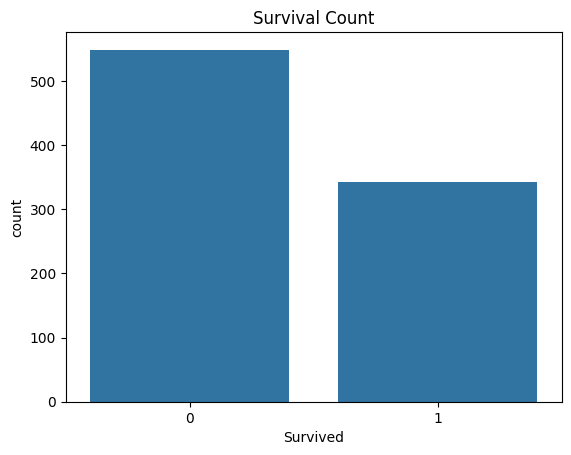

In [35]:
# Visualize survival counts
sns.countplot(x='Survived', data=train_df)
plt.title('Survival Count')
plt.show()

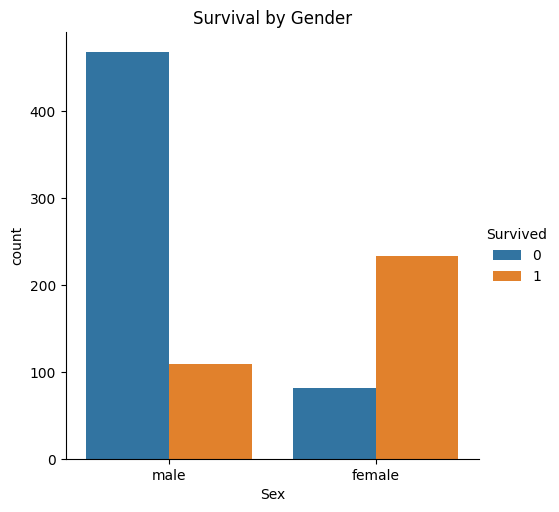

In [36]:
# Visualize survival by gender
sns.catplot(x='Sex', hue='Survived', kind='count', data=train_df)
plt.title('Survival by Gender')
plt.show()

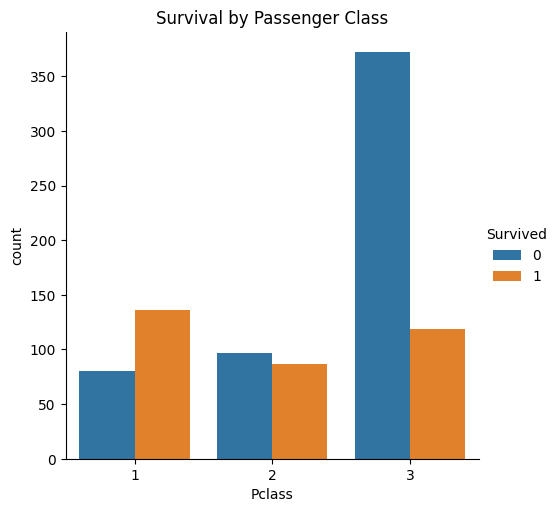

In [37]:
# Visualize survival by passenger class
sns.catplot(x='Pclass', hue='Survived', kind='count', data=train_df)
plt.title('Survival by Passenger Class')
plt.show()

## 4. Data Preprocessing
We will proceed with encoding categorical variables.
What’s happening here:
The 'Sex' column in the dataset is originally categorical with two possible values: 'male' and 'female'.
Machine learning models generally work with numerical data rather than strings or categories.
The .map() function is used to convert these categorical values to numeric values:
'male' is mapped to 1.
'female' is mapped to 0.
Why we do this:
Converting categorical values to numerical format allows the machine learning model to process the data. In this case, a binary transformation (1 for male, 0 for female) is appropriate since there are only two categories for gender.

In [38]:
# Convert 'Sex' to numeric (1 = male, 0 = female)
train_df['Sex'] = train_df['Sex'].map({'male': 1, 'female': 0})
test_df['Sex'] = test_df['Sex'].map({'male': 1, 'female': 0})

# One-hot encode 'Embarked' and 'Pclass'
train_df = pd.get_dummies(train_df, columns=['Embarked', 'Pclass'], drop_first=True)
test_df = pd.get_dummies(test_df, columns=['Embarked', 'Pclass'], drop_first=True)



One-hot encoding is a technique that converts categorical variables into multiple binary columns:
For each unique category, a new column is created with 1 if the passenger belongs to that category, and 0 otherwise.
For example, if a passenger embarked from 'C' (Cherbourg), the 'Embarked_C' column will be 1, while 'Embarked_Q' and 'Embarked_S' will be 0

## 5. Training the Model
We will now build a Random Forest classifier to predict survival.

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [39]:
# Drop unnecessary columns from train and test datasets
X = train_df.drop(columns=['Survived', 'PassengerId', 'Name', 'Ticket', 'Cabin'])
y = train_df['Survived']

test_features = test_df.drop(columns=['PassengerId', 'Name', 'Ticket', 'Cabin'])

# Train-test split for validation test_size=0.2: 
# This specifies that 20% of the data should be used as the validation set, and 80% should be used as the training set.
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Random Forest model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Make predictions on the validation set
y_pred = model.predict(X_val)
roc_auc_score 

# Evaluate the model
accuracy = accuracy_score(y_val, y_pred)
print(f'Validation Accuracy: {accuracy:.2f}')


Validation Accuracy: 0.82


## 6. Making Predictions for the Test Set
Finally, we will use the trained model to make predictions on the test set.

In [41]:
test_predictions = model.predict(test_features)

# Prepare the submission file
submission = pd.DataFrame({
    'PassengerId': test_df['PassengerId'],
    'Survived': test_predictions
})

# Save the submission file
submission.to_csv('titanic_submission.csv', index=False)


## 7. Conclusion
In this notebook, we walked through the process of data loading, exploration, preprocessing, and model training using the Titanic dataset. We trained a Random Forest classifier to predict survival, and you can further improve this model by experimenting with other algorithms, feature engineering, and hyperparameter tuning.

Quellen:
